## Hydrogen Torch - Augmentation Strategy

[Albumentations documentation](https://albumentations.ai/docs/)  
[Albumentations documentation - 利用可能なデータ拡張](https://albumentations.ai/docs/api_reference/augmentations/)  
[Albumentations GitHub - 利用可能なデータ拡張](https://github.com/albumentations-team/albumentations#pixel-level-transforms)

In [8]:
import os

import albumentations as A
import cv2
import matplotlib.pyplot as plt

In [9]:
image_dir = os.path.join('sample_data', 'sample_imgs')
image_files = ['office.jpg', 'robo.jpg', 'traffic.jpg', 'zoo.jpg']

### Original

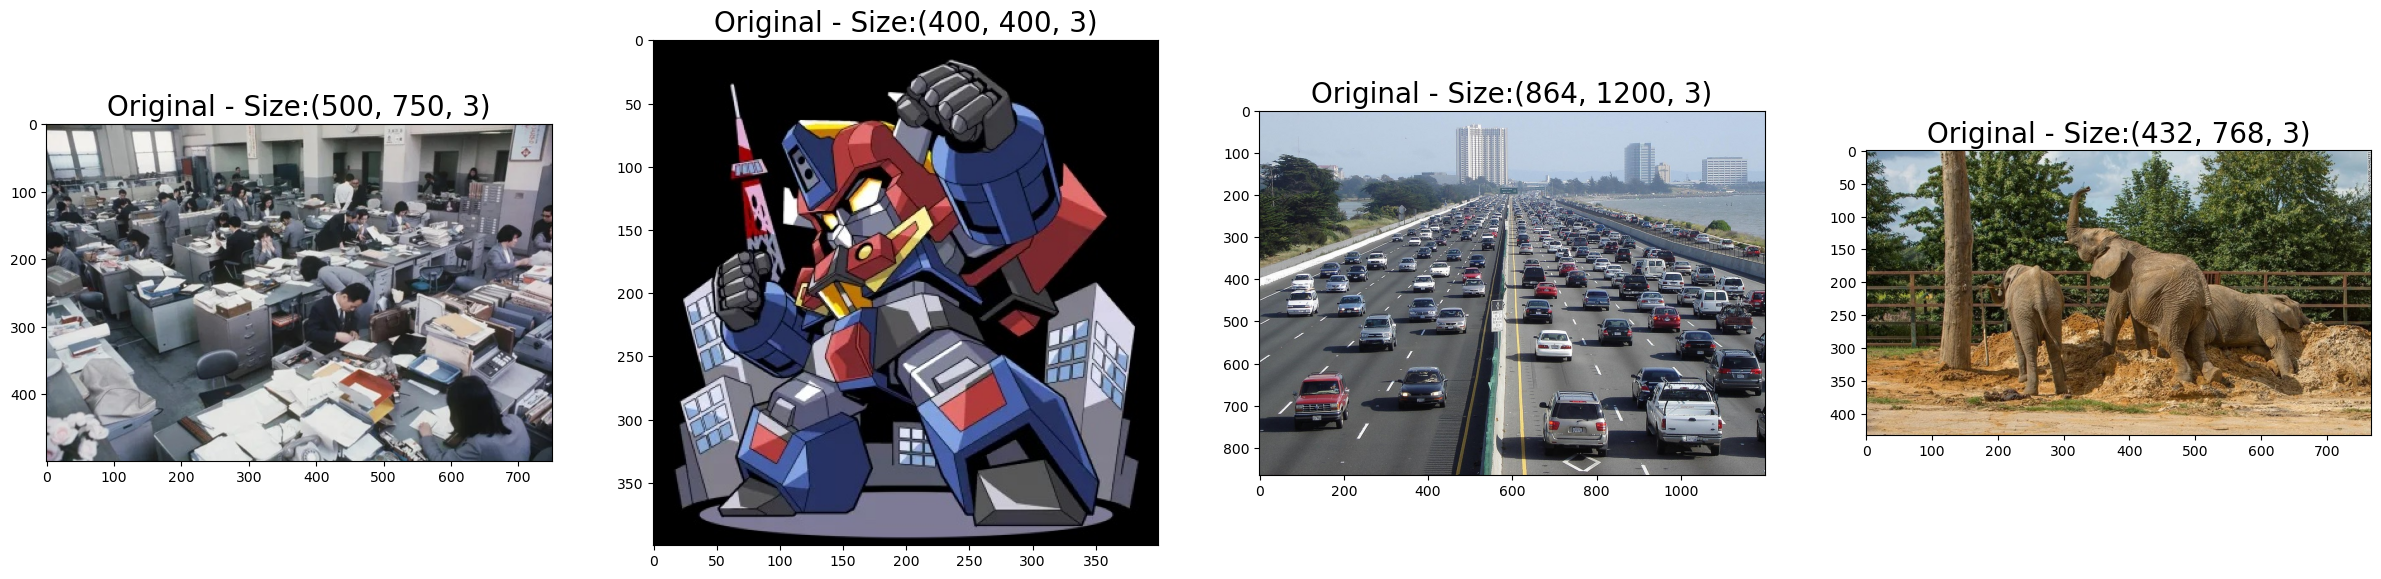

In [41]:
fig = plt.figure(figsize=(30, 60))
for i, img in enumerate(image_files):
        ax = fig.add_subplot(1, len(image_files), i+1)
        im = cv2.imread(os.path.join(image_dir, img))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(im)
        ax.set_title('Original - Size:{}'.format(im.shape), fontsize=20)

### Soft
 - [Resize](https://albumentations.ai/docs/api_reference/augmentations/geometric/resize/#albumentations.augmentations.geometric.resize.Resize)
 - [HorizontalFlip](https://albumentations.ai/docs/api_reference/augmentations/geometric/transforms/#albumentations.augmentations.geometric.transforms.HorizontalFlip) 

In [46]:
transform_soft = A.Compose([
    A.Resize(height=224, width=224, p=1),    # リサイズ（圧縮）
    A.HorizontalFlip(p=1),    # 左右反転
])
transform_soft

Compose([
  Resize(always_apply=False, p=1, height=224, width=224, interpolation=1),
  HorizontalFlip(always_apply=False, p=1),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

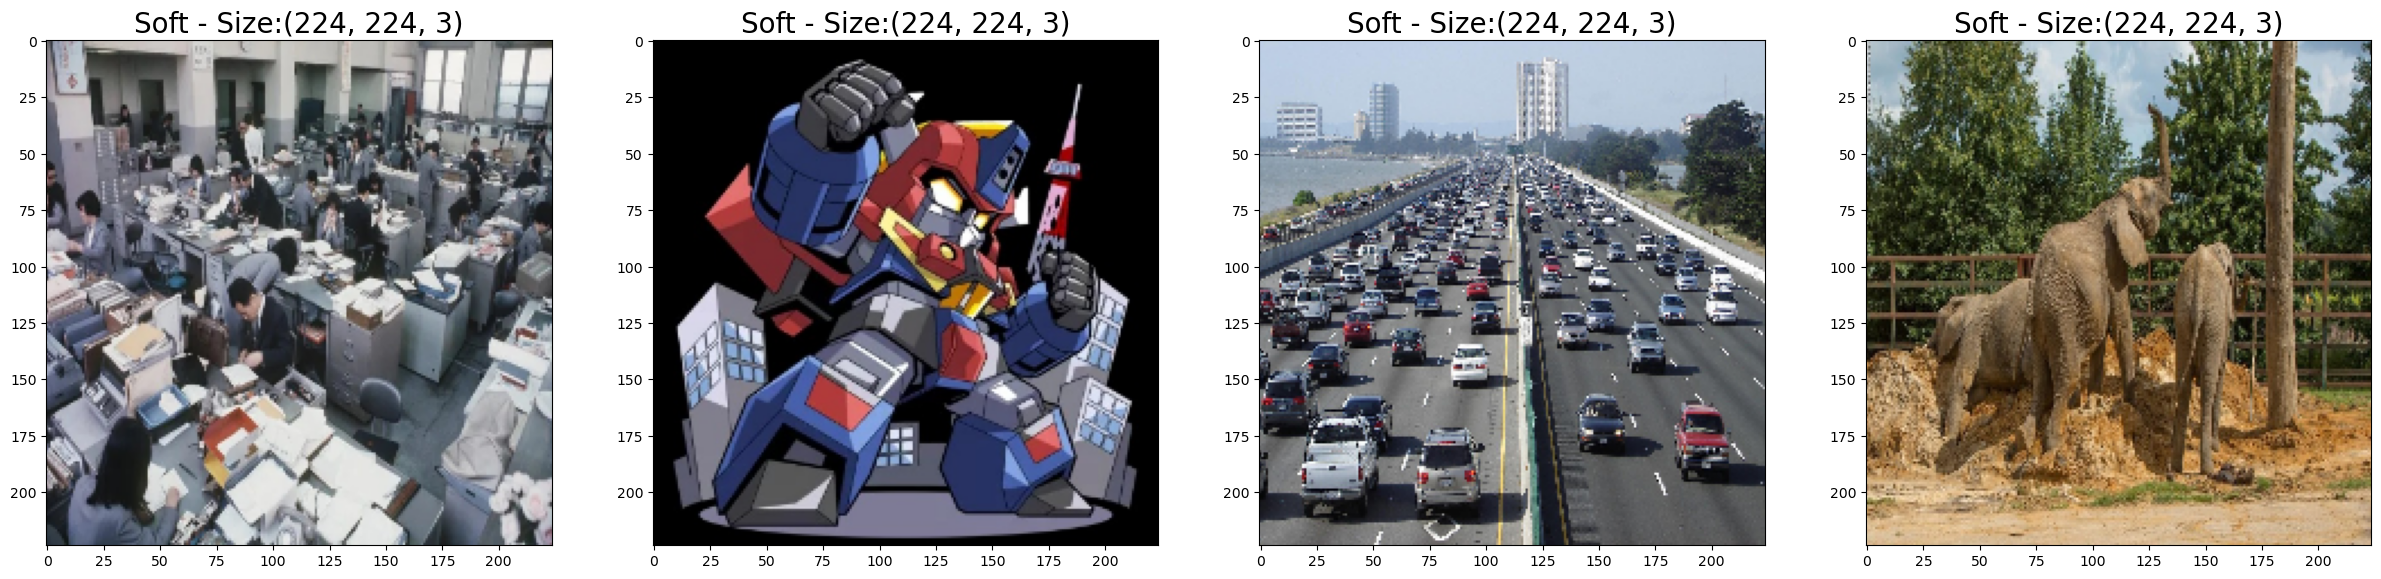

In [42]:
fig = plt.figure(figsize=(30, 60))
for i, img in enumerate(image_files):
        ax = fig.add_subplot(1, len(image_files), i+1)
        im = cv2.imread(os.path.join(image_dir, img))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im_ransformed = transform_soft(image=im)["image"]
        plt.imshow(im_ransformed)
        ax.set_title('Soft - Size:{}'.format(im_ransformed.shape), fontsize=20)

### Medium
 - [ShiftScaleRotate](https://albumentations.ai/docs/api_reference/augmentations/geometric/transforms/#albumentations.augmentations.geometric.transforms.ShiftScaleRotate)
 - [CoarseDropout](https://albumentations.ai/docs/api_reference/augmentations/dropout/coarse_dropout/#albumentations.augmentations.dropout.coarse_dropout.CoarseDropout) 

In [51]:
transform_medium = A.Compose([
    A.Resize(height=224, width=224, p=1),    # リサイズ（圧縮）
    A.HorizontalFlip(p=1),    # 左右反転
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=45, p=1),   # ずらし、縮小/拡大、回転
    A.CoarseDropout(max_holes=20, p=1)    # 穴を開ける
])
transform_medium

Compose([
  Resize(always_apply=False, p=1, height=224, width=224, interpolation=1),
  HorizontalFlip(always_apply=False, p=1),
  ShiftScaleRotate(always_apply=False, p=1, shift_limit_x=(-0.2, 0.2), shift_limit_y=(-0.2, 0.2), scale_limit=(-0.19999999999999996, 0.19999999999999996), rotate_limit=(-45, 45), interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box'),
  CoarseDropout(always_apply=False, p=1, max_holes=20, max_height=8, max_width=8, min_holes=20, min_height=8, min_width=8, fill_value=0, mask_fill_value=None),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

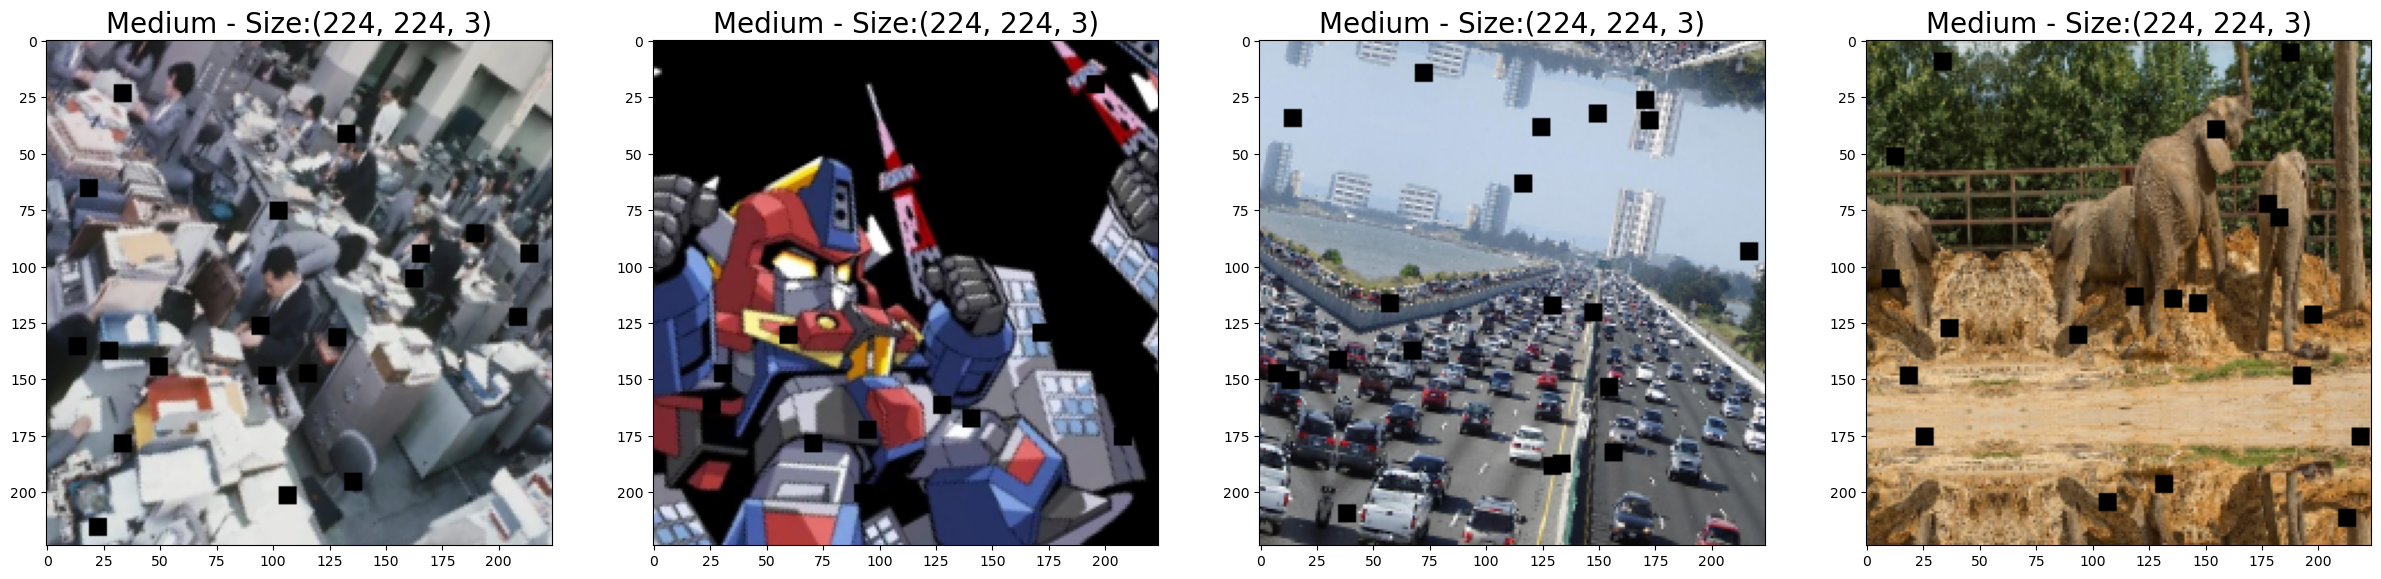

In [52]:
fig = plt.figure(figsize=(30, 60))
for i, img in enumerate(image_files):
        ax = fig.add_subplot(1, len(image_files), i+1)
        im = cv2.imread(os.path.join(image_dir, img))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im_ransformed = transform_medium(image=im)["image"]
        plt.imshow(im_ransformed)
        ax.set_title('Medium - Size:{}'.format(im_ransformed.shape), fontsize=20)

### Hard
 - [RandomResizedCrop](https://albumentations.ai/docs/api_reference/augmentations/crops/transforms/#albumentations.augmentations.crops.transforms.RandomResizedCrop)
 - [RandomBrightnessContrast](https://albumentations.ai/docs/api_reference/augmentations/transforms/#albumentations.augmentations.transforms.RandomBrightnessContrast) 

In [70]:
transform_hard = A.Compose([
    A.RandomResizedCrop(height=224, width=224, scale=(0.5, 1.0), p=1),    # 画像の切り抜きによるリサイズ
    A.HorizontalFlip(p=1),    # 左右反転
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=45, p=1),   # ずらし、縮小/拡大、回転
    A.CoarseDropout(max_holes=20, p=1),    # 穴を開ける
    A.RandomBrightnessContrast(brightness_limit=0.8, contrast_limit=0.8, p=0.1),    # 明るさ、コントラスト
])
transform_hard

Compose([
  RandomResizedCrop(always_apply=False, p=1, height=224, width=224, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1),
  HorizontalFlip(always_apply=False, p=1),
  ShiftScaleRotate(always_apply=False, p=1, shift_limit_x=(-0.2, 0.2), shift_limit_y=(-0.2, 0.2), scale_limit=(-0.19999999999999996, 0.19999999999999996), rotate_limit=(-45, 45), interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box'),
  CoarseDropout(always_apply=False, p=1, max_holes=20, max_height=8, max_width=8, min_holes=20, min_height=8, min_width=8, fill_value=0, mask_fill_value=None),
  RandomBrightnessContrast(always_apply=False, p=0.1, brightness_limit=(-0.8, 0.8), contrast_limit=(-0.8, 0.8), brightness_by_max=True),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

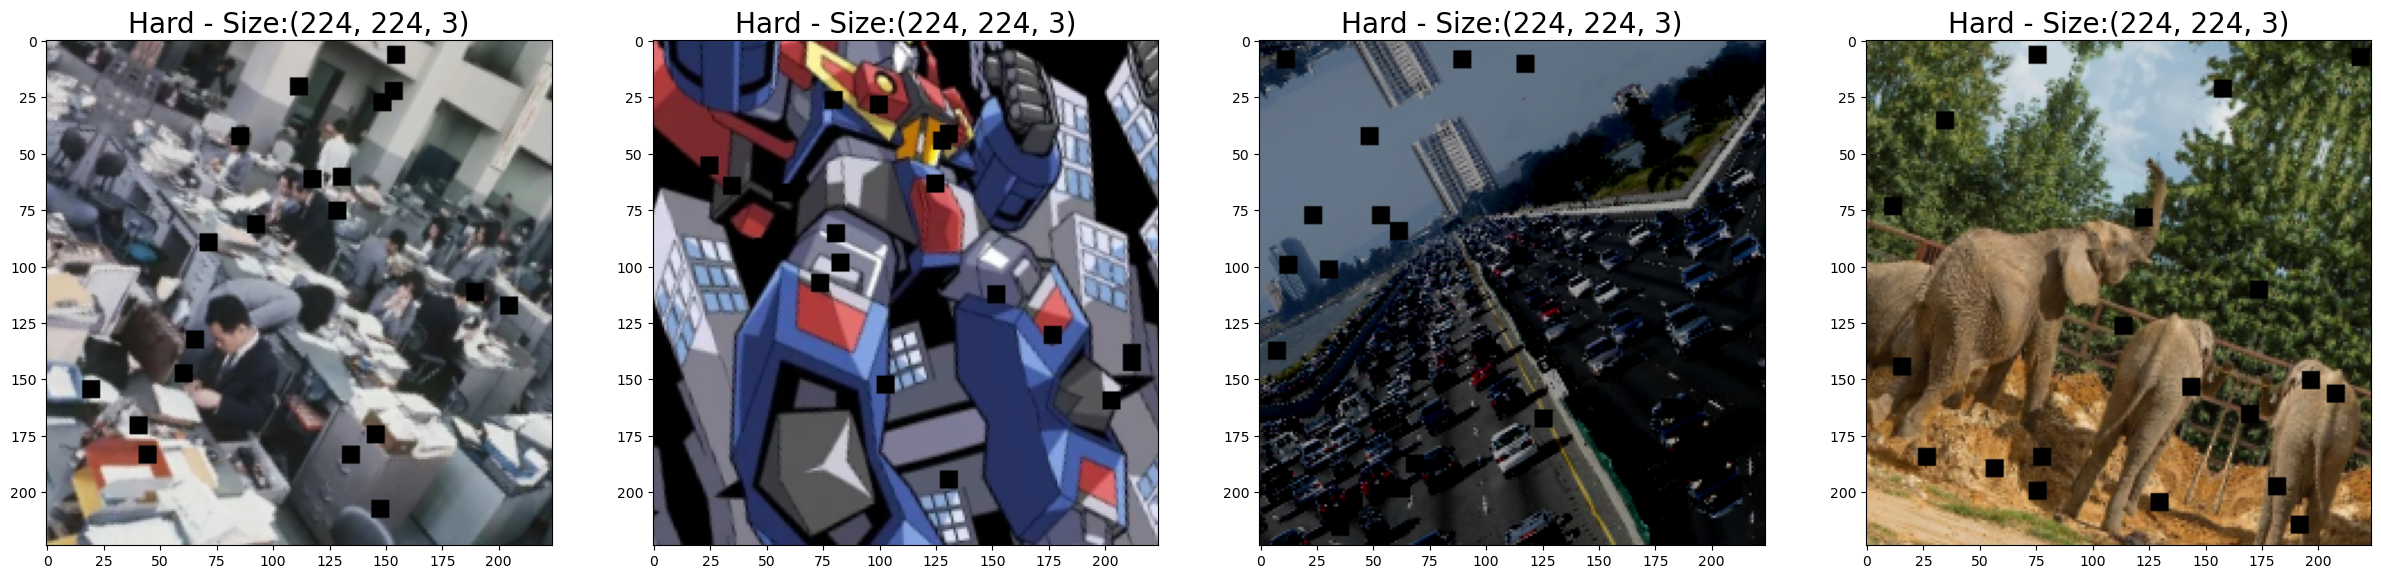

In [77]:
fig = plt.figure(figsize=(30, 60))
for i, img in enumerate(image_files):
        ax = fig.add_subplot(1, len(image_files), i+1)
        im = cv2.imread(os.path.join(image_dir, img))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im_ransformed = transform_hard(image=im)["image"]
        plt.imshow(im_ransformed)
        ax.set_title('Hard - Size:{}'.format(im_ransformed.shape), fontsize=20)